In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# some code to control figure aeshetics
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [13]:
data = pd.read_csv("/Users/jiapei/Desktop/AI4ALL/immunity_output/norm_counts_subset.txt", delimiter = "\t") 

# visualize the top 10 lines of our data
data.head(n=10)

,CATACTTCAACAGCTT-30,CGAGCACCAGGTCTCG-17,CAACTAGAGCTACCTA-4,AGACGTTTCAGTCAGT-1,TGGGAAGCACGGCTAC-16,TCTGGAAAGCCAGAAC-7,ATCTACTTCGCAAACT-8,TGTGTTTGTCGACTGC-16,CCTAAGAGTCCGAAAG-31,TAAGAGATCGTCCGTT-15,...,GTAACACCACGCGTCA-28,ACTGATGCAGCGAACA-1,CGCTGGAAGCCACTAT-7,GTGCTTCCACAGACTT-18,TAGTGGTTCTGCCCTA-18,CCCATACTCTTGCAAG-5,AGAGCGATCTCTGCTG-9,AAGGTTCGTGGACGAT-18,CAGCGACTCCGGCACA-7,TCTATTGAGGACGAAA-15
AL627309.1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL669831.5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM87B,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LINC00115,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM41C,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL645608.3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAMD11,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NOC2L,0.0,0.0,3.450656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.602305,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KLHL17,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PLEKHN1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
phenos = pd.read_csv("/Users/jiapei/Desktop/AI4ALL/immunity_output/metadata_subset.txt", 
                     delimiter = "\t", index_col=0) 

In [15]:
# We can check the number of samples and number of genes
# Note that data is downsized from 76467 samples (cells) to 1000 samples (cells)
data.shape

(21295, 1000)

In [16]:
# We can also output columns names (or cell barcodes)
data.columns

Index(['CATACTTCAACAGCTT-30', 'CGAGCACCAGGTCTCG-17', 'CAACTAGAGCTACCTA-4',
       'AGACGTTTCAGTCAGT-1', 'TGGGAAGCACGGCTAC-16', 'TCTGGAAAGCCAGAAC-7',
       'ATCTACTTCGCAAACT-8', 'TGTGTTTGTCGACTGC-16', 'CCTAAGAGTCCGAAAG-31',
       'TAAGAGATCGTCCGTT-15',
       ...
       'GTAACACCACGCGTCA-28', 'ACTGATGCAGCGAACA-1', 'CGCTGGAAGCCACTAT-7',
       'GTGCTTCCACAGACTT-18', 'TAGTGGTTCTGCCCTA-18', 'CCCATACTCTTGCAAG-5',
       'AGAGCGATCTCTGCTG-9', 'AAGGTTCGTGGACGAT-18', 'CAGCGACTCCGGCACA-7',
       'TCTATTGAGGACGAAA-15'],
      dtype='object', length=1000)

In [17]:
# And row names (or genes)
data.index

Index(['AL627309.1', 'AL669831.5', 'FAM87B', 'LINC00115', 'FAM41C',
       'AL645608.3', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1',
       ...
       'AC145212.1', 'MAFIP', 'AC011043.1', 'AL592183.1', 'AC007325.4',
       'AL354822.1', 'AC004556.1', 'AC233755.2', 'AC233755.1', 'AC240274.1'],
      dtype='object', length=21295)

In [18]:
# This gives us some summary statistics about int/float columns
data.describe()

,CATACTTCAACAGCTT-30,CGAGCACCAGGTCTCG-17,CAACTAGAGCTACCTA-4,AGACGTTTCAGTCAGT-1,TGGGAAGCACGGCTAC-16,TCTGGAAAGCCAGAAC-7,ATCTACTTCGCAAACT-8,TGTGTTTGTCGACTGC-16,CCTAAGAGTCCGAAAG-31,TAAGAGATCGTCCGTT-15,...,GTAACACCACGCGTCA-28,ACTGATGCAGCGAACA-1,CGCTGGAAGCCACTAT-7,GTGCTTCCACAGACTT-18,TAGTGGTTCTGCCCTA-18,CCCATACTCTTGCAAG-5,AGAGCGATCTCTGCTG-9,AAGGTTCGTGGACGAT-18,CAGCGACTCCGGCACA-7,TCTATTGAGGACGAAA-15
count,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,...,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000
mean,0.469594,0.469594,0.469594,0.469594,0.469594,0.469594,0.469594,0.469594,0.469594,0.469594,...,0.469594,0.469594,0.469594,0.469594,0.469594,0.469594,0.469594,0.469594,0.469594,0.469594
std,4.833710,6.920020,6.437570,3.426004,6.063192,9.230206,6.598517,6.572748,4.606065,5.537160,...,5.088839,6.759452,6.281240,4.534163,6.014590,5.832272,6.813309,7.092465,8.257082,6.447667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,587.058039,661.609777,538.302277,200.538761,501.379945,1191.548320,571.912014,516.703786,335.636723,397.595932,...,363.957597,622.111625,612.391931,320.431472,537.337021,376.390077,681.114551,719.011910,918.624161,372.763419


In [19]:
# We also have info about sample phenotypes
phenos

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,cluster,dx,patient,nCount_SCT,nFeature_SCT,SCT_snn_res.0.2,seurat_clusters
0,CATACTTCAACAGCTT-30,immunity,3228,1634,0.681537,CD8,VE,VE57538,2998,1632,5,5
1,CGAGCACCAGGTCTCG-17,immunity,1206,496,2.155887,CD4,MS,MS79670,2373,513,0,0
2,CAACTAGAGCTACCTA-4,immunity,3431,886,1.340717,CD4,MS,MS71658,2898,885,1,1
3,AGACGTTTCAGTCAGT-1,immunity,5927,1921,1.602834,pDC,MS,MS19270,3341,1656,12,12
4,TGGGAAGCACGGCTAC-16,immunity,938,454,0.000000,mono2,MS,MS77654,2174,501,3,3
5,TCTGGAAAGCCAGAAC-7,immunity,3258,1010,2.087170,CD8,IIH,IIH45044,2887,1010,4,4
6,ATCTACTTCGCAAACT-8,immunity,3799,886,2.632272,CD4,IIH,IIH85037,2955,883,1,1
7,TGTGTTTGTCGACTGC-16,immunity,1524,676,2.755906,CD4,MS,MS77654,2245,686,0,0
8,CCTAAGAGTCCGAAAG-31,immunity,3663,1330,3.139503,CD4,VE,VE66730,3039,1327,2,2
9,TAAGAGATCGTCCGTT-15,immunity,914,441,3.719912,mono1,MS,MS76177,2163,476,3,3


In [23]:
phenos['dx'].value_counts()

MS       417
VE       284
IIH      252
COVID     37
Name: dx, dtype: int64

In [24]:
# We can also use pandas built in functions and get totals of each cancer type
phenos.groupby(['dx']).size()

dx
COVID     37
IIH      252
MS       417
VE       284
dtype: int64

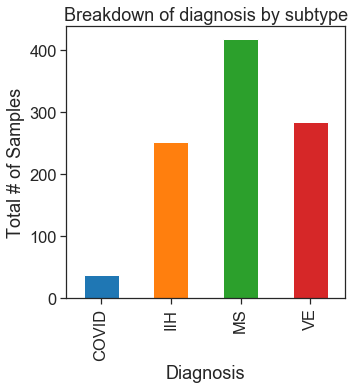

In [28]:
# First we number of samples (cells) vs. diagnosis
count_by_dx = phenos.groupby(['dx']).size()
count_by_dx.plot.bar(figsize=(5,5),legend=False)
# setting labels make plots more informative
plt.xlabel("Diagnosis")
plt.ylabel("Total # of Samples")
# titles are important for plot interpretation!
plt.title("Breakdown of diagnosis by subtype")
plt.show()

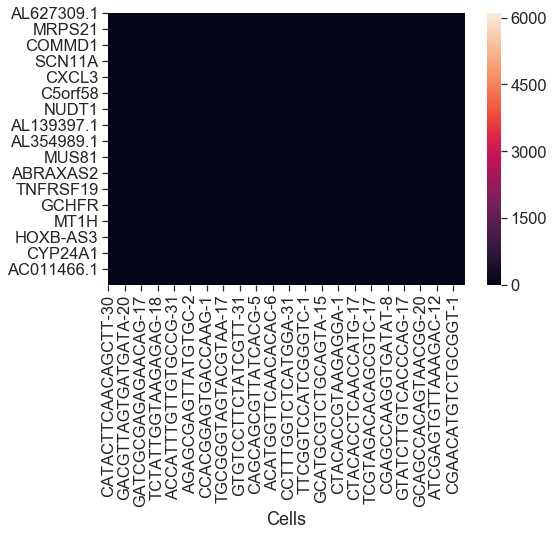

In [27]:
# We can also create a heatmap of the gene expression
# create empty figure
fig,ax = plt.subplots(figsize=(8,5))
# add heatmap
sns.heatmap(data,ax=ax)
# set informative x label
plt.xlabel("Cells")
plt.show()

In [29]:
# There are MANY genes which makes it hard to visualize the data with a heatmap
# Let's select 5 genes for plotting
data.iloc[:5,:]

,CATACTTCAACAGCTT-30,CGAGCACCAGGTCTCG-17,CAACTAGAGCTACCTA-4,AGACGTTTCAGTCAGT-1,TGGGAAGCACGGCTAC-16,TCTGGAAAGCCAGAAC-7,ATCTACTTCGCAAACT-8,TGTGTTTGTCGACTGC-16,CCTAAGAGTCCGAAAG-31,TAAGAGATCGTCCGTT-15,...,GTAACACCACGCGTCA-28,ACTGATGCAGCGAACA-1,CGCTGGAAGCCACTAT-7,GTGCTTCCACAGACTT-18,TAGTGGTTCTGCCCTA-18,CCCATACTCTTGCAAG-5,AGAGCGATCTCTGCTG-9,AAGGTTCGTGGACGAT-18,CAGCGACTCCGGCACA-7,TCTATTGAGGACGAAA-15
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL669831.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM87B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LINC00115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM41C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


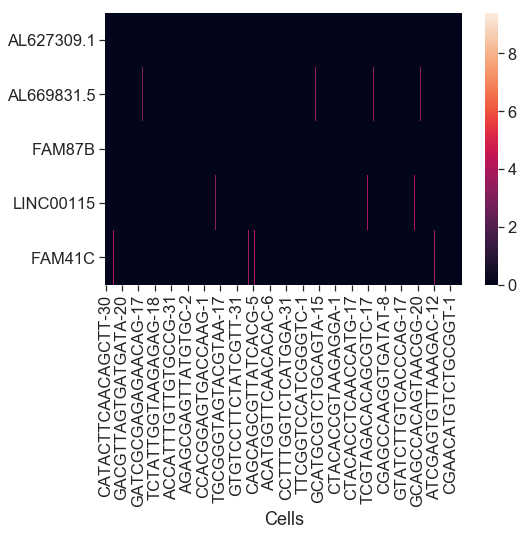

In [30]:
# Now we can plot!
sub_data = data.iloc[:5,:]
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(sub_data,ax=ax)
plt.xlabel("Cells")
plt.show()

In [35]:
# If we have a gene list we can also extract from a pandas dataframe
gene_list = ["LYZ","CD52","IL7R","CD14","CX3CR1"]
data.loc[gene_list,:]

,CATACTTCAACAGCTT-30,CGAGCACCAGGTCTCG-17,CAACTAGAGCTACCTA-4,AGACGTTTCAGTCAGT-1,TGGGAAGCACGGCTAC-16,TCTGGAAAGCCAGAAC-7,ATCTACTTCGCAAACT-8,TGTGTTTGTCGACTGC-16,CCTAAGAGTCCGAAAG-31,TAAGAGATCGTCCGTT-15,...,GTAACACCACGCGTCA-28,ACTGATGCAGCGAACA-1,CGCTGGAAGCCACTAT-7,GTGCTTCCACAGACTT-18,TAGTGGTTCTGCCCTA-18,CCCATACTCTTGCAAG-5,AGAGCGATCTCTGCTG-9,AAGGTTCGTGGACGAT-18,CAGCGACTCCGGCACA-7,TCTATTGAGGACGAAA-15
LYZ,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,9.246417,...,28.268551,0.000000,0.000000,9.517766,0.000000,0.00000,39.805396,0.000000,0.000000,0.000000
CD52,0.000000,37.926675,6.901311,0.0,4.599816,10.391410,10.152284,35.634744,9.871668,4.623209,...,0.000000,21.329541,36.023055,0.000000,35.559068,12.83148,8.845644,39.700044,8.389262,34.791252
IL7R,0.000000,16.856300,6.901311,0.0,0.000000,17.319016,3.384095,13.363029,52.648898,0.000000,...,0.000000,7.109847,3.602305,0.000000,3.951008,0.00000,0.000000,8.822232,0.000000,14.910537
CD14,0.000000,0.000000,0.000000,0.0,18.399264,0.000000,0.000000,0.000000,0.000000,0.000000,...,31.802120,0.000000,0.000000,22.208122,3.951008,0.00000,22.114109,0.000000,0.000000,0.000000
CX3CR1,3.335557,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.533569,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


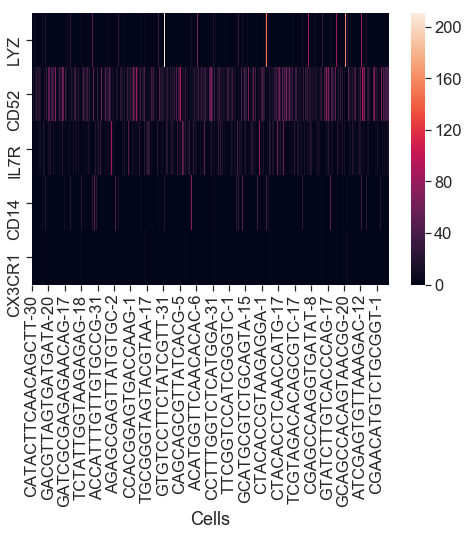

In [36]:
# Now we can plot!
sub_data_2 = data.loc[gene_list,:]
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(sub_data_2,ax=ax)
plt.xlabel("Cells")
plt.show()

In [37]:
# We can also use pandas to find the genes with the highest variance across samples
data_var = data.var(axis=1).sort_values(ascending=False)
print(data_var)
print("\n") # start a new block
print("Our data type")
print(type(data_var)) # This is known as a series in python

IGKC          70822.653592
MALAT1        65989.470853
IGLC2         28705.672468
TMSB4X         9634.555892
B2M            8381.611567
SPP1           7086.239671
IGHM           6030.584769
RPS27          3570.061691
FTH1           3467.422399
RPL13A         3362.126410
FTL            3272.143372
EEF1A1         2476.499951
RPL41          2171.382673
RPL21          2102.270018
RPLP2          2031.065715
RPL10          1880.645268
RPL34          1828.569040
RPS12          1809.816530
CD74           1807.598219
TPT1           1797.684365
IGHG1          1508.918284
RPS18          1445.794003
RPL13          1429.790182
ACTB           1400.677376
RPS19          1353.858253
RPLP1          1264.361799
RPS2           1237.681517
RPS6           1229.882571
GNLY           1158.762494
RPS14          1148.503535
                  ...     
AC068768.2        0.000000
WDFY3-AS1         0.000000
AC027290.1        0.000000
PIWIL1            0.000000
LINC01257         0.000000
AC093677.2        0.000000
T

In [38]:
# In a series we can separate indices
print(data_var.index) # gene names and values
print("\n")
print(data_var.values) # expression variance

Index(['IGKC', 'MALAT1', 'IGLC2', 'TMSB4X', 'B2M', 'SPP1', 'IGHM', 'RPS27',
       'FTH1', 'RPL13A',
       ...
       'AC073911.1', 'AC112719.2', 'AC131212.1', 'ART3', 'AC148476.1',
       'GALNT9', 'AC137590.2', 'STBD1', 'CCDC158', 'AL627309.1'],
      dtype='object', length=21295)


[70822.65359151 65989.47085339 28705.67246784 ...     0.
     0.             0.        ]


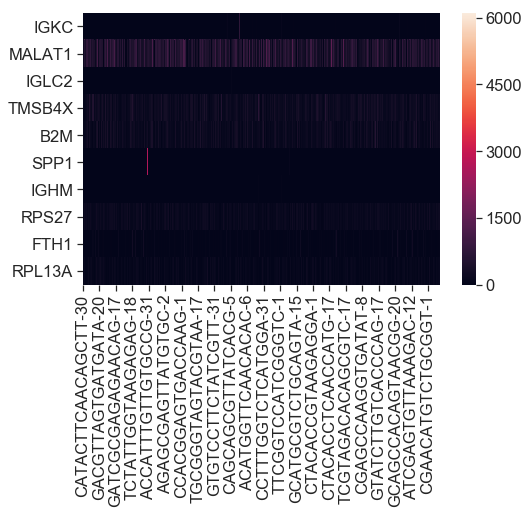

In [42]:
# Make heatmap of top 10 genes with highest variance across samples (cells)
topgenes = data.var(axis=1).sort_values(ascending=False).index[:10] #axis = 1 is across, =0 is vertical/cols

sub_data = data.loc[topgenes, :]
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(sub_data)
plt.show()

In [43]:
#boolean indexing
#finds all the values that are COVID in the data set
phenos[phenos["dx"] == "COVID"].head() 

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,cluster,dx,patient,nCount_SCT,nFeature_SCT,SCT_snn_res.0.2,seurat_clusters
18,CCACACTGTTCAAACC-26,immunity,3019,1497,3.411726,NK,COVID,COV1950,2877,1497,7,7
19,ATGCATGCATGTCTAG-27,immunity,2372,1135,3.834808,CD8,COVID,COV1954,2481,1135,6,6
21,AACGGGAGTTGCATTG-28,immunity,3057,1222,1.275761,CD4,COVID,COV1933,2850,1222,2,2
54,AAAGGATTCTCGCTCA-28,immunity,6419,1896,1.339773,CD4,COVID,COV1933,3280,1467,2,2
107,TCATTTGAGGGAGATA-27,immunity,2902,953,1.826327,CD4,COVID,COV1954,2764,953,2,2


In [44]:
patient_id_COVID = list(phenos[phenos["dx"] == "COVID"].index)
patient_id_IIH = list(phenos[phenos["dx"] == "IIH"].index)
patient_id_MS = list(phenos[phenos["dx"] == "MS"].index)
patient_id_VE = list(phenos[phenos["dx"] == "VE"].index)

In [47]:
# split gene expression data into different diagnosis categories
patient_id_COVID

[18,
 19,
 21,
 54,
 107,
 123,
 167,
 171,
 198,
 261,
 320,
 325,
 331,
 345,
 373,
 441,
 448,
 510,
 523,
 610,
 617,
 657,
 673,
 675,
 682,
 746,
 767,
 770,
 833,
 857,
 868,
 884,
 893,
 903,
 938,
 953,
 990]

In [49]:
expr_COVID = data.iloc[:,patient_id_COVID]
expr_IIH = data.iloc[:,patient_id_IIH]
expr_MS = data.iloc[:,patient_id_MS]
expr_VE = data.iloc[:,patient_id_VE]

In [50]:
# check we generated the correct dataframes (i.e. number of columns should match number of samples)
print(data.shape)
print(expr_COVID.shape)
print(expr_IIH.shape)
print(expr_MS.shape)
print(expr_VE.shape)

(21295, 1000)
(21295, 37)
(21295, 252)
(21295, 417)
(21295, 284)


In [61]:
# This code is used to compute the z-score for each gene
# A Z-score helps us assess differential expression between 2 conditions (e.g. diagnosis)
# To make things simple, let's compare COVID cases with VE (closest clinical symptoms)

# Calculate the mean expression of each gene across subtypes
m_COVID = np.transpose(expr_COVID).mean()
m_VE = np.transpose(expr_VE).mean()

# Calculate the variance 
v_COVID = np.transpose(expr_COVID).var()
v_VE = np.transpose(expr_VE).var()

# Get the number of each condition
n_COVID = expr_COVID.shape[1]
n_VE = expr_VE.shape[1]

# Calculate the z-score
# z > 0 means gene expression is higher in COVID
# z < 0 means gene expression is higher in VE
z = (m_COVID-m_VE)/np.sqrt(v_COVID/n_COVID + v_VE/n_VE)

/Users/jiapei/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jiapei/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


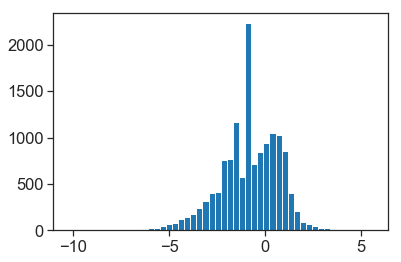

In [62]:
# We can plot the distribution of the z-scores
plt.hist(z,bins=50)
plt.show()

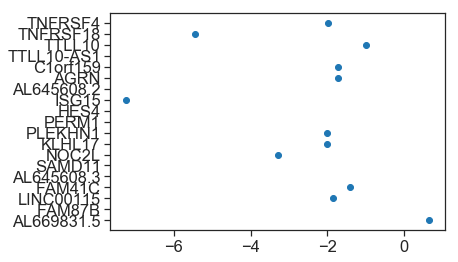

In [63]:
# We can also make a scatter plot of the z-scores for 20 genes 
plt.scatter(z[:20].values,z[:20].index)
plt.show()

In [73]:
# Find 5 most differentially expressed genes between COVID and VE
diff_genes = z.abs().sort_values(ascending=False)[:5].index
# to visualize we want to order patients based on their true label
ordered_ids = np.append(patient_id_COVID,patient_id_VE)

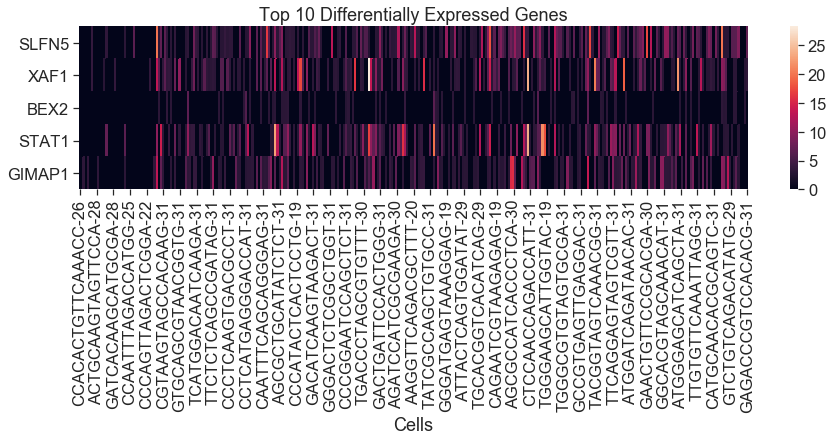

In [75]:
# ready to plot!
fig,ax = plt.subplots(figsize=(15,3))

diff_data = data.loc[diff_genes,:]
diff_data = diff_data.iloc[:,ordered_ids]

sns.heatmap(diff_data,ax=ax)
plt.xlabel("Cells")
plt.title("Top 10 Differentially Expressed Genes")
plt.show()

In [76]:
data.T.head() # transpose x and y 

,AL627309.1,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.3,SAMD11,NOC2L,KLHL17,PLEKHN1,...,AC145212.1,MAFIP,AC011043.1,AL592183.1,AC007325.4,AL354822.1,AC004556.1,AC233755.2,AC233755.1,AC240274.1
CATACTTCAACAGCTT-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
CGAGCACCAGGTCTCG-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
CAACTAGAGCTACCTA-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.450656,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AGACGTTTCAGTCAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.993116,0.0,0.0,0.0
TGGGAAGCACGGCTAC-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [77]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(data.T)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [78]:
x_pca = pd.DataFrame(pca.transform(data.T),columns = ["PC1","PC2"],index=data.columns)
x_pca

,PC1,PC2
CATACTTCAACAGCTT-30,-23.330397,86.837368
CGAGCACCAGGTCTCG-17,-126.832480,136.829430
CAACTAGAGCTACCTA-4,-42.740764,-15.011012
AGACGTTTCAGTCAGT-1,190.770637,-239.754453
TGGGAAGCACGGCTAC-16,258.902055,-425.218014
TCTGGAAAGCCAGAAC-7,-399.910742,550.897036
ATCTACTTCGCAAACT-8,-60.146698,12.659033
TGTGTTTGTCGACTGC-16,-59.635463,44.205384
CCTAAGAGTCCGAAAG-31,98.466978,-155.543940
TAAGAGATCGTCCGTT-15,126.836894,-231.146237


In [79]:
x_pca.shape

(1000, 2)

In [87]:
x_pca["dx"] = list(phenos["dx"])
x_pca

,PC1,PC2,dx
CATACTTCAACAGCTT-30,-23.330397,86.837368,VE
CGAGCACCAGGTCTCG-17,-126.832480,136.829430,MS
CAACTAGAGCTACCTA-4,-42.740764,-15.011012,MS
AGACGTTTCAGTCAGT-1,190.770637,-239.754453,MS
TGGGAAGCACGGCTAC-16,258.902055,-425.218014,MS
TCTGGAAAGCCAGAAC-7,-399.910742,550.897036,IIH
ATCTACTTCGCAAACT-8,-60.146698,12.659033,IIH
TGTGTTTGTCGACTGC-16,-59.635463,44.205384,MS
CCTAAGAGTCCGAAAG-31,98.466978,-155.543940,VE
TAAGAGATCGTCCGTT-15,126.836894,-231.146237,MS


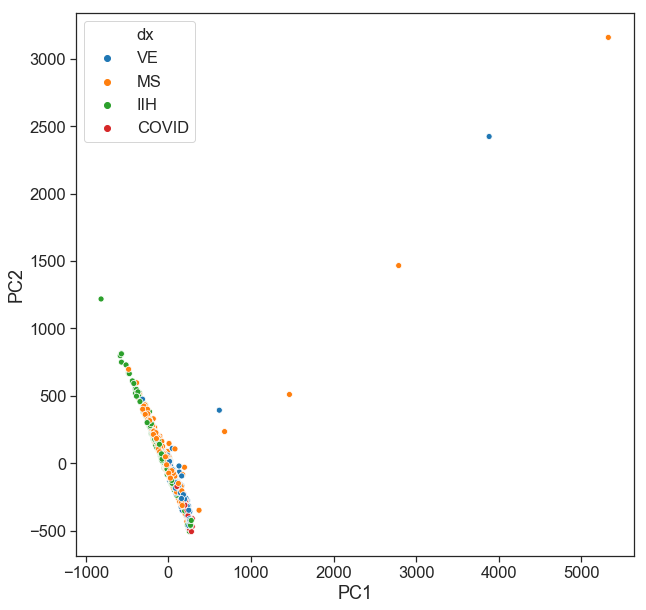

In [88]:
fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = "PC1", y = "PC2",hue="dx",data=x_pca,ax=ax)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show() # looks like PC1 and PC2 are not enough to separate the different conditions!

In [92]:
## QC and data cleanup ##
# Step 1: check for missing values

# what happens when you run data.isna().all() or data.isna().any(axis=1)
data.isna().any()

CATACTTCAACAGCTT-30    False
CGAGCACCAGGTCTCG-17    False
CAACTAGAGCTACCTA-4     False
AGACGTTTCAGTCAGT-1     False
TGGGAAGCACGGCTAC-16    False
TCTGGAAAGCCAGAAC-7     False
ATCTACTTCGCAAACT-8     False
TGTGTTTGTCGACTGC-16    False
CCTAAGAGTCCGAAAG-31    False
TAAGAGATCGTCCGTT-15    False
AACCAACCATAGGTAA-31    False
CGTAAGTAGCCACAAG-31    False
AACTCAGCAGGAACGT-1     False
TAGTTGGAGTAGTGCG-7     False
TCTCTAACACGAAAGC-16    False
TATCTCATCAGTACGT-8     False
ACAGCTACACATGGGA-17    False
ACATACGTCCGGCACA-7     False
CCACACTGTTCAAACC-26    False
ATGCATGCATGTCTAG-27    False
TGAGCCGAGTGTCTCA-16    False
AACGGGAGTTGCATTG-28    False
TCATTTGAGATACACA-5     False
GACCTTCAGATGATTG-31    False
GGAAAGCCAATGAATG-1     False
AGAGTGGTCCATGCTC-20    False
TTATGCTCAAGTAGTA-1     False
GCAAACTGTTCCGGCA-15    False
CATCAGAGTAAGCACG-4     False
CTGTCGTCAGTTGTCA-31    False
                       ...  
TGACAACAGGCCCTTG-12    False
CGGGTCACACTCTGTC-10    False
CCACTACAGAGTCGGT-7     False
AACCATGTCGAGAG

In [130]:
phenos.isnull().values.any() # there are some NaN labels --> discard data with no labels!

True

In [131]:
index = phenos.loc[pd.isna(phenos["dx"]), :].index
index

Index(['CTACAGACAAGTGGTG-31', 'GTCATTTCAATGCCAT-8', 'TCTATTGGTGGCTCCA-15',
       'CACCAGGCAGACGCAA-12', 'TGTCCCATCCGAATGT-9', 'GTGTGGCCACCAGTTA-30',
       'AGGGAGTTCTCGTTTA-16', 'ACACCAAAGGTTACCT-15', 'TGGCTGGAGTGACATA-15',
       'CGTCCATGTCGACTGC-14'],
      dtype='object')

In [132]:
# drop rows in phenos with no dx label
phenos = phenos.drop(index)
# check dataframe size
phenos.shape

(990, 11)

In [96]:
# step 2: reformat data
data = data.T
data

,AL627309.1,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.3,SAMD11,NOC2L,KLHL17,PLEKHN1,...,AC145212.1,MAFIP,AC011043.1,AL592183.1,AC007325.4,AL354822.1,AC004556.1,AC233755.2,AC233755.1,AC240274.1
CATACTTCAACAGCTT-30,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
CGAGCACCAGGTCTCG-17,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
CAACTAGAGCTACCTA-4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,3.450656,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
AGACGTTTCAGTCAGT-1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,2.993116,0.0,0.0,0.000000
TGGGAAGCACGGCTAC-16,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
TCTGGAAAGCCAGAAC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
ATCTACTTCGCAAACT-8,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
TGTGTTTGTCGACTGC-16,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
CCTAAGAGTCCGAAAG-31,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
TAAGAGATCGTCCGTT-15,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000


In [126]:
# drop rows in data with no dx label
data = data.drop(index)
# check dataframe size
data.shape

(990, 21295)

In [133]:
phenos.shape[0] == data.shape[0] # check the correct number of rows are dropped from both data and phenos

True

In [134]:
# step 3: split data into training and testing sets
from sklearn.model_selection import train_test_split

# reload phenos, using cell barcode as index name
phenos_diag = list(phenos["dx"]) # only use the diagnosis column as label

# Split up the X (data) and y (phenos) datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(data,phenos_diag,stratify=phenos_diag,
                                                    test_size=0.25,random_state=35,)

In [144]:
from pandas import DataFrame
y_train = DataFrame(y_train,columns=['dx']) #turn list into dataframe
y_test = DataFrame(y_test,columns=['dx'])

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(742, 21295)
(248, 21295)
(742, 1)
(248, 1)


In [137]:
# ignore warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [139]:
data.isna().values.any() 

False

In [140]:
data.isnull().values.any() 

False

In [145]:
y_train.groupby("dx").size()

dx
COVID     28
IIH      189
MS       312
VE       213
dtype: int64

In [146]:
y_test.groupby("dx").size()

dx
COVID      9
IIH       63
MS       105
VE        71
dtype: int64

In [147]:
## Decision Tree ##

# sklearn has these classifiers built in
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier with a max_depth of 5 -- defining our model
classifier = DecisionTreeClassifier(max_depth=5,random_state=35) # max features is 5

# Fit the classifier to the training set
classifier = classifier.fit(X_train, y_train)

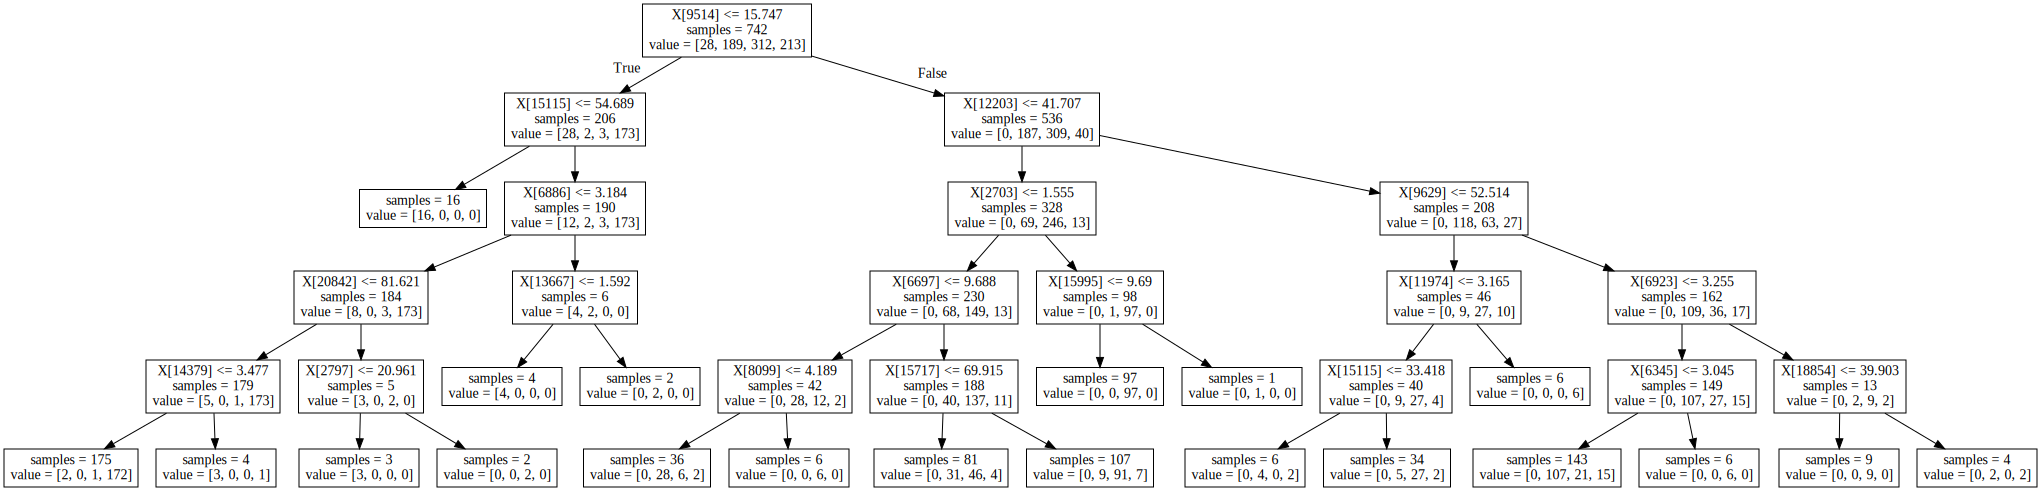

In [149]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(classifier, out_file=None, impurity=False) 
graph = graphviz.Source(dot_data) 
graph # brief note: 994.0 is the expression value

In [150]:
# create heatmap showing gene expression
X_train.iloc[:,9514].name # select gene in the first node / root node

'RPL7'

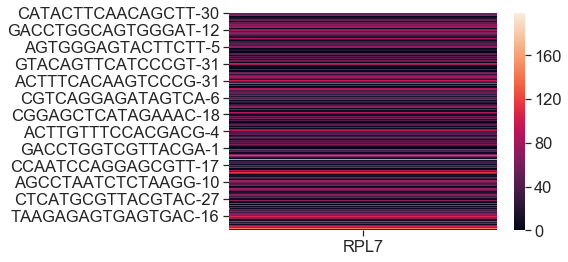

In [151]:
model_gene = data.loc[:, ['RPL7']]
sns.heatmap(model_gene)
plt.show()

In [152]:
# test decision tree model
# Create a list of predicted classes for each of the examples in the test set
y_predict = classifier.predict(X_test) 

print(y_predict) # outputs are labels for our testing data

['VE' 'VE' 'MS' 'IIH' 'IIH' 'MS' 'IIH' 'IIH' 'IIH' 'VE' 'IIH' 'VE' 'IIH'
 'COVID' 'IIH' 'VE' 'VE' 'MS' 'MS' 'MS' 'MS' 'MS' 'MS' 'IIH' 'MS' 'VE'
 'MS' 'MS' 'MS' 'MS' 'IIH' 'MS' 'IIH' 'VE' 'IIH' 'MS' 'COVID' 'VE' 'MS'
 'VE' 'IIH' 'MS' 'MS' 'MS' 'IIH' 'MS' 'IIH' 'VE' 'IIH' 'MS' 'MS' 'IIH'
 'MS' 'MS' 'VE' 'MS' 'VE' 'VE' 'VE' 'VE' 'MS' 'VE' 'VE' 'MS' 'MS' 'MS'
 'IIH' 'IIH' 'MS' 'VE' 'VE' 'MS' 'VE' 'MS' 'MS' 'VE' 'VE' 'VE' 'MS' 'MS'
 'IIH' 'IIH' 'IIH' 'MS' 'IIH' 'VE' 'VE' 'MS' 'COVID' 'VE' 'MS' 'IIH' 'MS'
 'IIH' 'IIH' 'MS' 'IIH' 'IIH' 'MS' 'VE' 'IIH' 'MS' 'VE' 'VE' 'MS' 'VE'
 'VE' 'MS' 'VE' 'VE' 'IIH' 'VE' 'VE' 'MS' 'IIH' 'MS' 'MS' 'IIH' 'MS' 'MS'
 'IIH' 'MS' 'VE' 'VE' 'VE' 'MS' 'IIH' 'MS' 'IIH' 'VE' 'VE' 'IIH' 'IIH'
 'VE' 'VE' 'IIH' 'MS' 'IIH' 'MS' 'VE' 'MS' 'MS' 'MS' 'MS' 'MS' 'VE' 'IIH'
 'IIH' 'MS' 'IIH' 'VE' 'MS' 'MS' 'IIH' 'MS' 'VE' 'MS' 'VE' 'VE' 'MS' 'MS'
 'MS' 'IIH' 'MS' 'MS' 'VE' 'IIH' 'VE' 'MS' 'VE' 'IIH' 'VE' 'MS' 'MS' 'IIH'
 'MS' 'IIH' 'VE' 'MS' 'MS' 'VE' 'MS' 'VE' 'IIH' 'MS' 'VE

In [153]:
accuracy = classifier.score(X_test, y_test) # score runs predict as well
print(accuracy)

0.7137096774193549


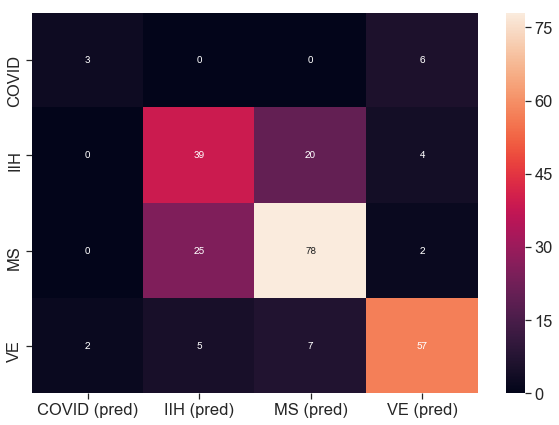

In [154]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
cm_df = pd.DataFrame(
    cm, 
    index = [idx for idx in ['COVID', 'IIH', 'MS', 'VE']],
    columns = [col for col in ['COVID (pred)', 'IIH (pred)', 'MS (pred)', 'VE (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True)
plt.show()
# true labels are rows, predicted are columns

In [155]:
## Logistic regression ##
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

# typical regression models use all features

# create the model
lr = LogisticRegression()
# fit the model
lr.fit(X_train,y_train)
# make predictions
y_predict_lr = lr.predict(X_test)
# calculate accuracy
accuracy = metrics.accuracy_score(np.array(y_test), y_predict_lr)
accuracy

/Users/jiapei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jiapei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8830645161290323

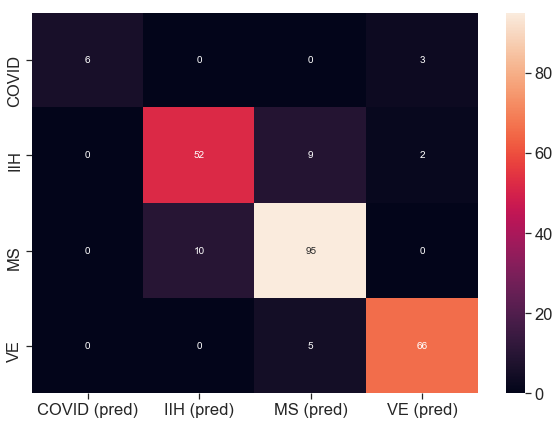

In [156]:
# confusion mtx
cm_lr = confusion_matrix(y_test,y_predict_lr)
cm_lr_df = pd.DataFrame(
    cm_lr, 
    index = [idx for idx in ['COVID', 'IIH', 'MS', 'VE']],
    columns = [col for col in ['COVID (pred)', 'IIH (pred)', 'MS (pred)', 'VE (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_lr_df, annot=True)
plt.show()

In [169]:
## Random forest ##
# one example to try
from sklearn.ensemble import RandomForestClassifier 
# extremely random, creates thousands of trees and comes up with a group decision based off that

classifier = RandomForestClassifier(max_depth = 5, random_state = 35) #try diff max_depth values and random_state values??
classifier = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
print ("percent accuracy: ", classifier.score(X_test, y_test))

percent accuracy:  0.6653225806451613


/Users/jiapei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


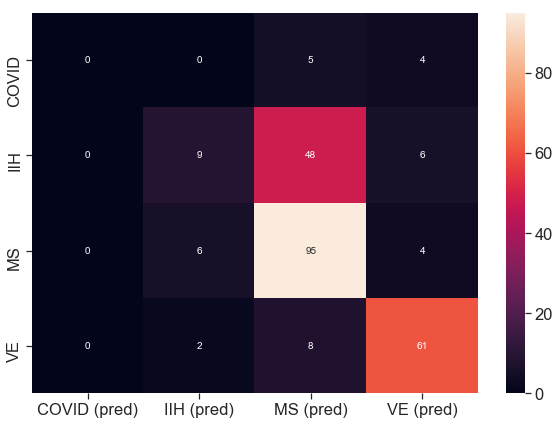

In [170]:
random_cm = confusion_matrix(y_test,y_predict)
random_cm_df = pd.DataFrame(
    random_cm, 
    index = [idx for idx in ['COVID', 'IIH', 'MS', 'VE']],
    columns = [col for col in ['COVID (pred)', 'IIH (pred)', 'MS (pred)', 'VE (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(random_cm_df, annot=True)
plt.show()

In [165]:
## Support Vector Machines ##
from sklearn.svm import SVC
classifier = SVC()
classifier = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
classifier.score(X_test, y_test)

/Users/jiapei/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5766129032258065

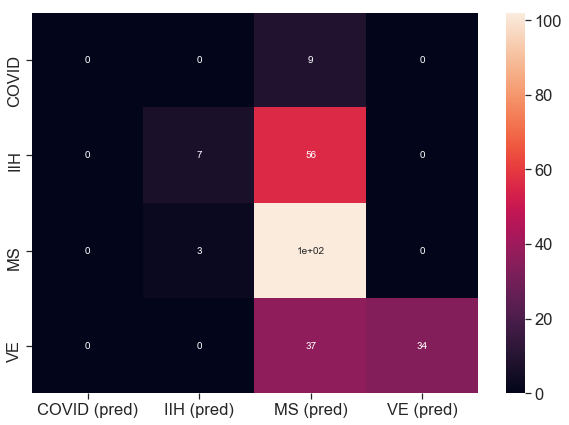

In [168]:
svc_cm = confusion_matrix(y_test,y_predict)
svc_cm_df = pd.DataFrame(
    svc_cm, 
    index = [idx for idx in ['COVID', 'IIH', 'MS', 'VE']],
    columns = [col for col in ['COVID (pred)', 'IIH (pred)', 'MS (pred)', 'VE (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(svc_cm_df, annot=True)
plt.show()

In [163]:
 ## Naive Bayes ##
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
print(classifier.score(X_test, y_test))

0.45161290322580644


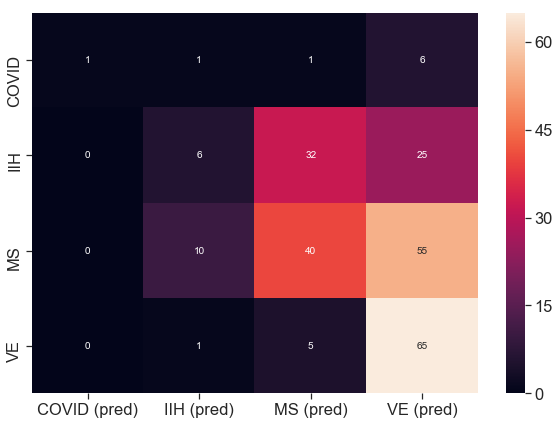

In [164]:
# the confusion matrix for the NB model
nb_cm = confusion_matrix(y_test,y_predict)
nb_cm_df = pd.DataFrame(
    nb_cm, 
    index = [idx for idx in ['COVID', 'IIH', 'MS', 'VE']],
    columns = [col for col in ['COVID (pred)', 'IIH (pred)', 'MS (pred)', 'VE (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(nb_cm_df, annot=True)
plt.show()